<a href="https://colab.research.google.com/github/himanshusingh38/data-science-projects/blob/main/Titanic_databased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content:

 1 Load and Inspect Data/
 2 Variable Description/
 3 Univariate Variable Analysis
     .Categorical Variable
     .Numerical Variable//
 4-Basic Data Analysis/
 5-Outlier Detection/
 6-Missing Value/
     .Find Missing Value/
     .Fill Missing Value//
 7-Visualization//
  .Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived//
     . SibSp -- Survived/
     .Parch -- Survived//
     .Pclass -- Survived//
     .Age -- Survived//
     .Pclass -- Survived -- Age///
     .Embarked -- Sex -- Pclass -- Survived ///
     .Embarked -- Sex -- Fare -- Survived//
     .Fill Missing: Age Feature//
 8-Feature Engineering////
     .Name -- Title//
     .Family Size//
     .Embarked//
     .Ticket//
     .Pclass//
      .Sex//
     .Drop Passenger ID and Cabin//
  9-Modeling///
     .Train - Test Split///
     .Simple Logistic Regression///
     .Hyperparameter Tuning -- Grid/// Search -- Cross Validation //
     .Ensemble Modeling //



In [1]:
# Core libraries
import os
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data & numerics
import numpy as np
import pandas as pd

In [3]:
#Visualization
import matplotlib .pyplot as plt
import seaborn as sns

Load & Inspect Data

In [4]:
train_df = pd.read_csv("/content/archive (2).zip")

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Varible Description**


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Categorical Variable

In [ ]:
def bar_plot(variable):
    """
    📊 Bar plot of a categorical feature with counts
    input: variable (e.g., "Sex")
    output: bar plot and value counts
    """
    # Extract column
    var = train_df[variable]

    # Count categories
    varValue = var.value_counts()

    # Plot
    plt.figure(figsize=(9, 3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    # Print counts
    print(f"{variable}: \n{varValue}")

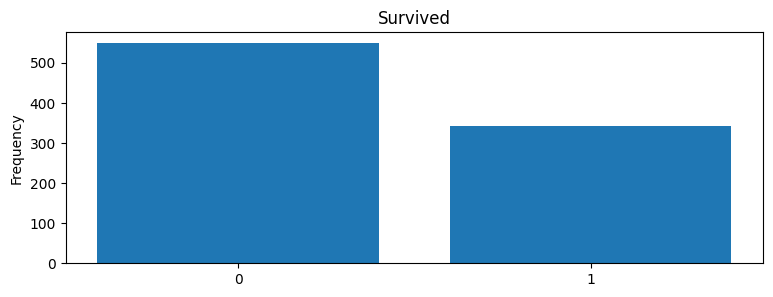

Survived: 
Survived
0    549
1    342
Name: count, dtype: int64


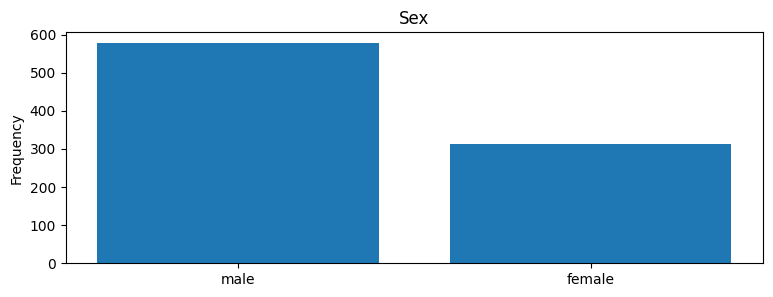

Sex: 
Sex
male      577
female    314
Name: count, dtype: int64


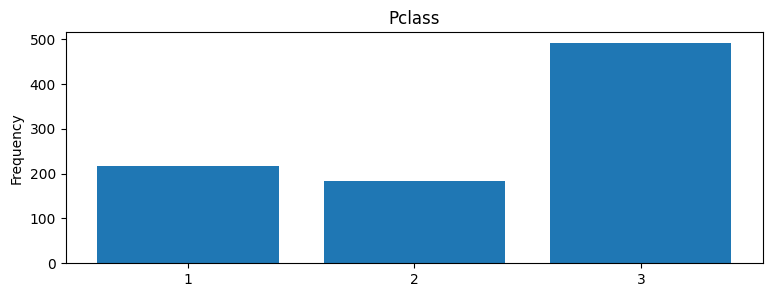

Pclass: 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


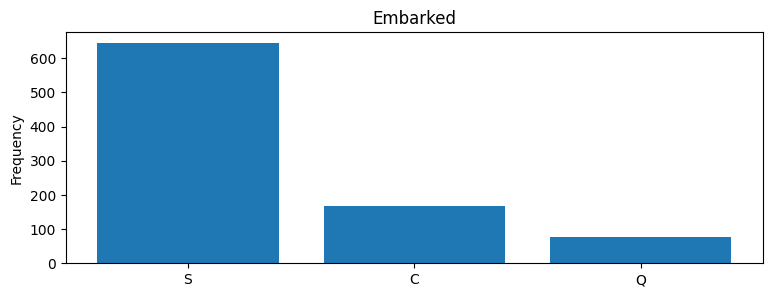

Embarked: 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


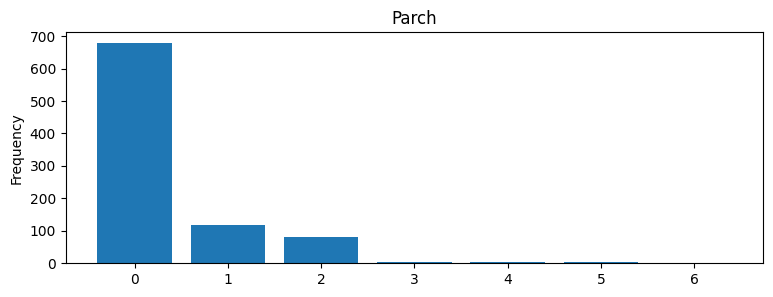

Parch: 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [ ]:
category1 =["Survived", "Sex", "Pclass", "Embarked", "Parch"]

for c in category1:
    bar_plot(c)

In [ ]:
category2 =["Cabin", "Name", "Ticket"]
for c in category2:
    print(f"{c}\n{train_df[c].value_counts()}\n")

Cabin
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Ticket
Ticket
347082              7
1601                7
CA. 2343            7
3101

Numerical Variables


In [ ]:
def plot_hist(variable):
    """
    📈 Histogram of a numerical feature
    input: variable (e.g., "Age")
    output: histogram plot showing distribution
    """
    plt.figure(figsize=(9, 3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution (Histogram)")
    plt.show()





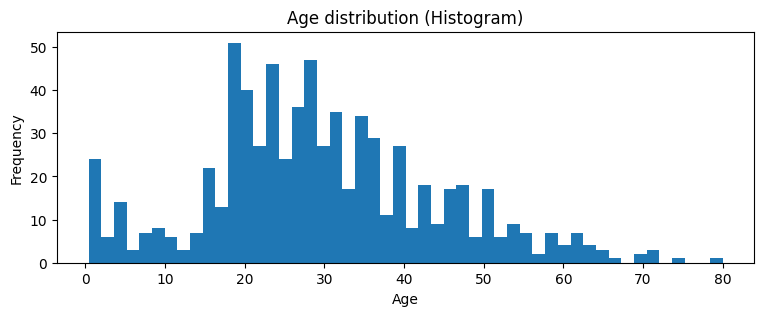

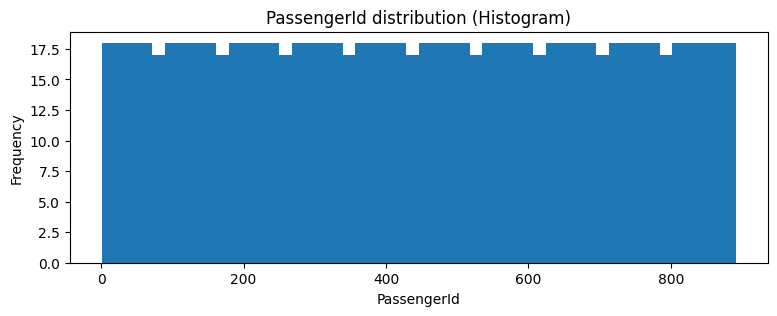

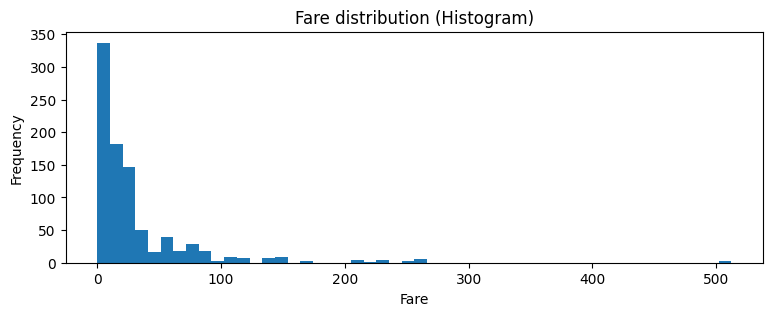

In [ ]:
numeric_var = ["Age", "PassengerId", "Fare"]
for n in numeric_var:
    plot_hist(n)


📊 Basic Data Analysis¶
Pclass → Survived
Sex → Survived
SibSp → Survived
Parch → Survived

In [ ]:
# Pclass vs Survived
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# Sex vs Survived
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# Sex vs Survived
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# Parch vs Survived
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values("Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000



🚨 Outlier Detection¶

In [ ]:
def detect_outliers(df, features):
    """
    🚨 Detect outliers using the IQR method
    input:
        df (DataFrame)   -> dataset
        features (list)  -> numerical columns to check
    output:
        list of indices with multiple outliers
    """
    outlier_indices = []

    for c in features:

        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1


        outlier_step = IQR * 1.5


        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index


        outlier_indices.extend(outlier_list_col)


    outlier_indices = Counter(outlier_indices)


    multiple_outliers = [i for i, v in outlier_indices.items() if v > 2]

    return multiple_outliers

In [ ]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# Drop outliers
train_df = train_df.drop(detect_outliers(train_df, ["Age","SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop = True)

🕳️ Missing Values¶
🔎 Find Missing Values
🧩 Fill Missing Values

In [ ]:
train_df_len = len(train_df)


🔎 Find Missing Values

In [ ]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,170
SibSp,0
Parch,0
Ticket,0
Fare,0


🧩 Fill Missing Values¶
⚓ Embarked has 2 missing values

In [ ]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


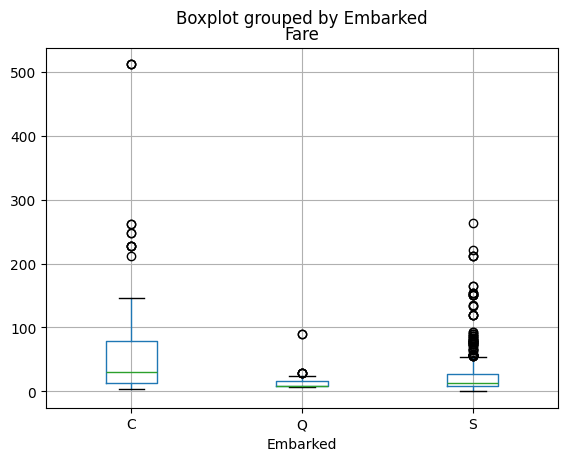

In [ ]:
train_df.boxplot(column="Fare", by="Embarked")
plt.show()

In [ ]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")  #
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


📊 Visualization¶


<Axes: >

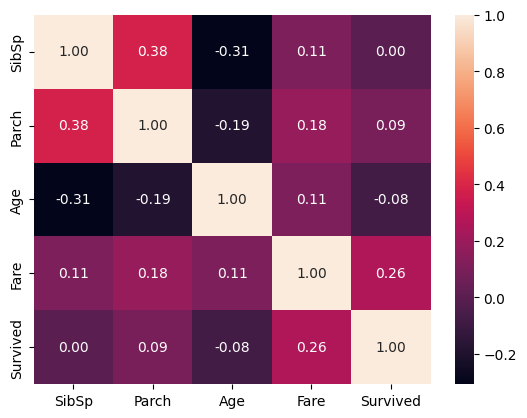

In [ ]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]  #
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")

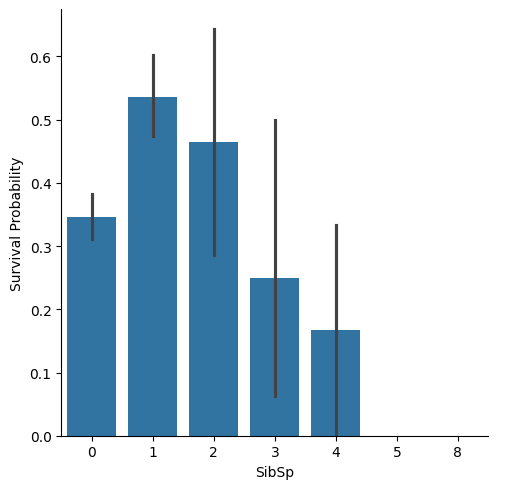

In [8]:
g = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival Probability")

plt.show()


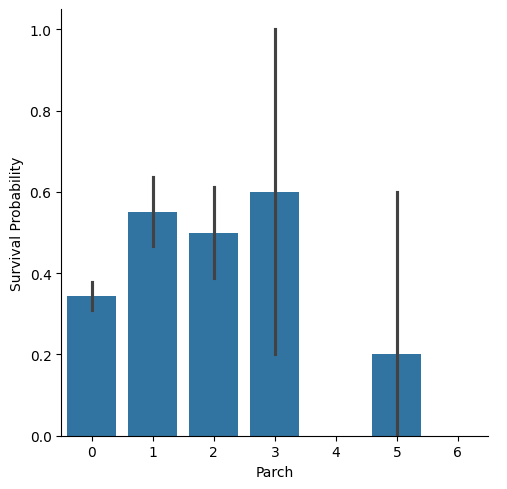

In [9]:
g = sns.catplot(x="Parch", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival Probability")
plt.show()

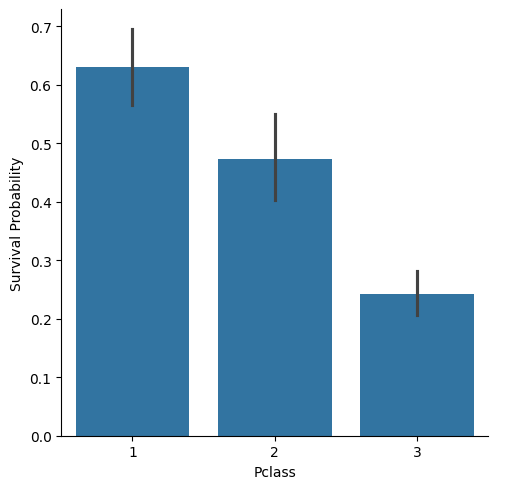

In [10]:
g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival Probability")
plt.show()

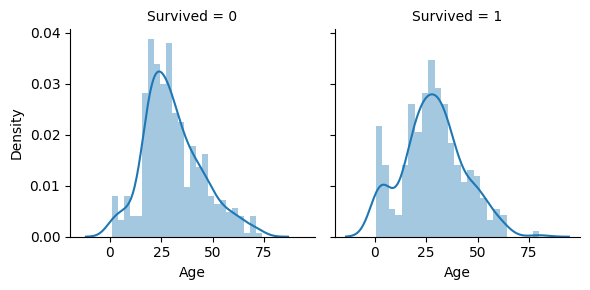

In [11]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

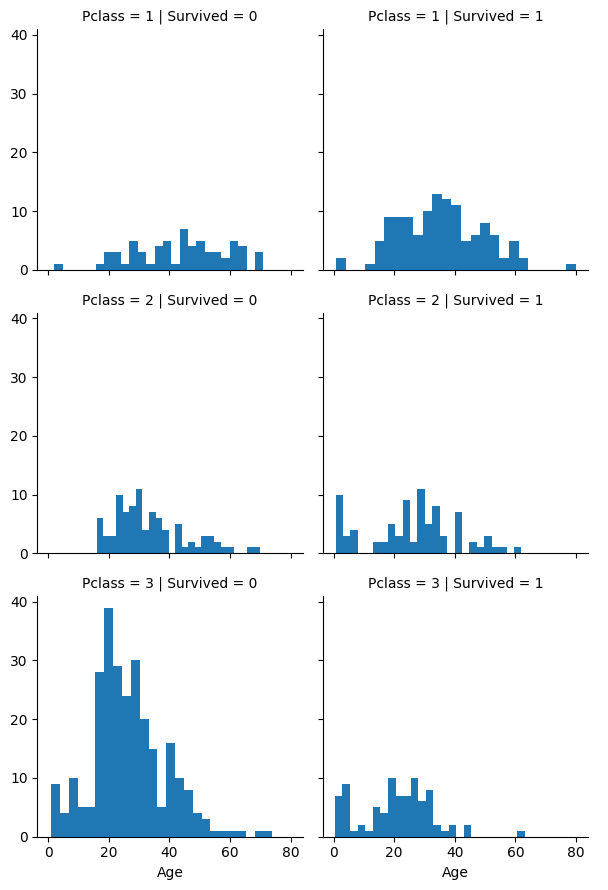

In [12]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

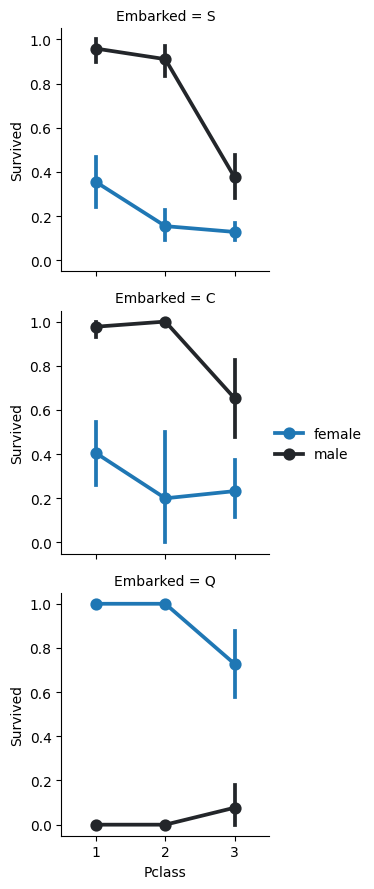

In [13]:
g = sns.FacetGrid(train_df, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

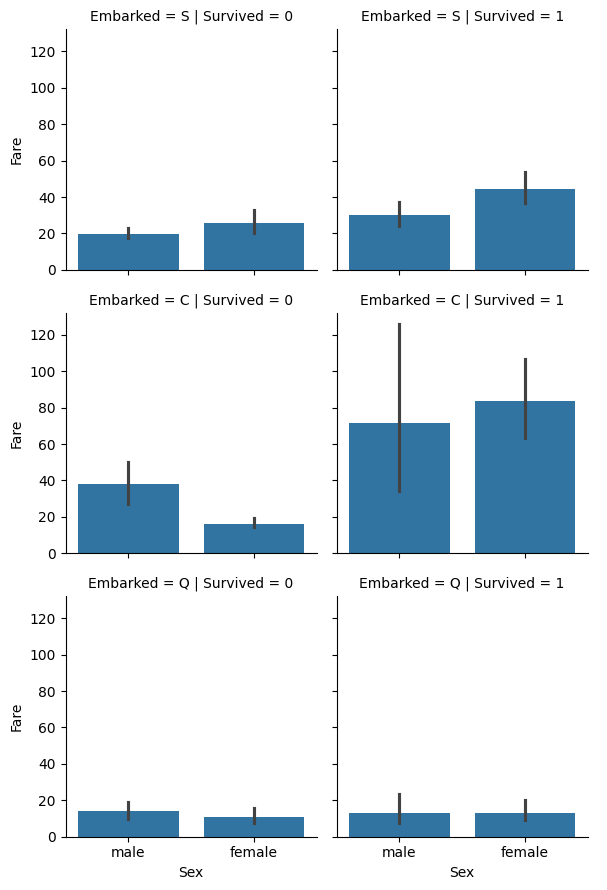

In [14]:
g = sns.FacetGrid(train_df, row="Embarked", col="Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

In [15]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


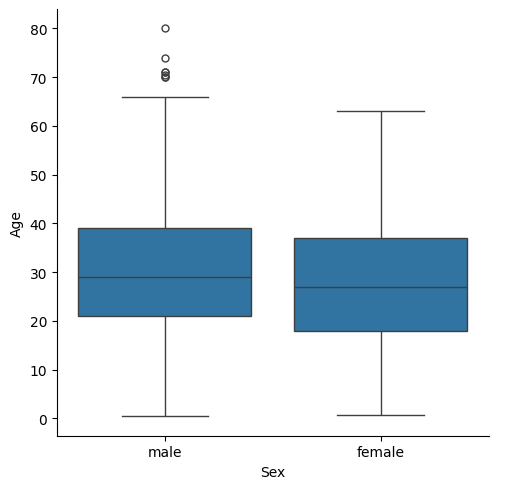

In [16]:
sns.catplot(x="Sex", y="Age", data=train_df, kind="box")

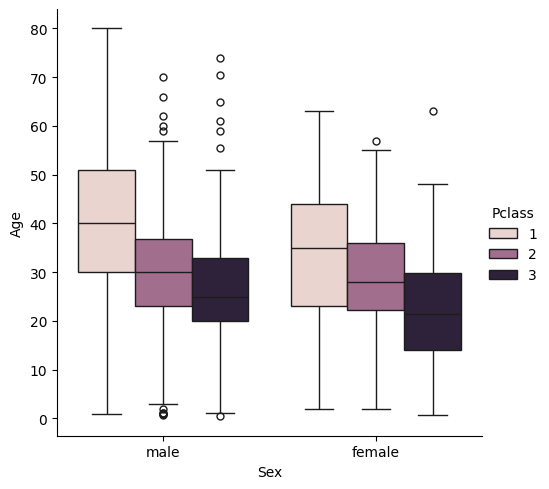

In [17]:
sns.catplot(x="Sex", y="Age", hue="Pclass", data=train_df, kind="box")
plt.show()

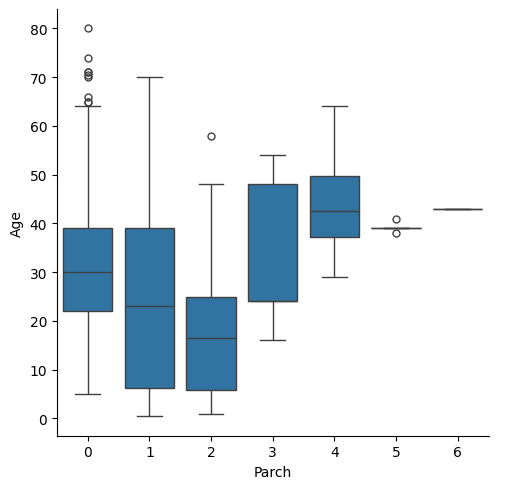

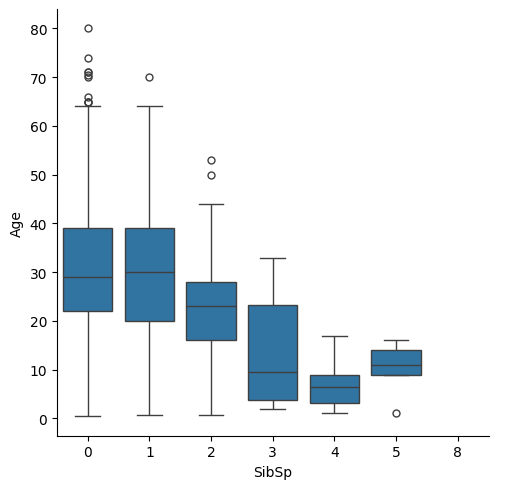

In [18]:
sns.catplot(x="Parch", y="Age", data=train_df, kind="box")
sns.catplot(x="SibSp", y="Age", data=train_df, kind="box")

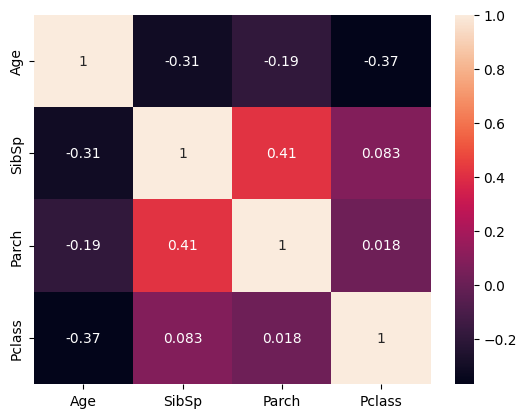

In [20]:
sns.heatmap(train_df[["Age", "SibSp", "Parch", "Pclass"]].corr(), annot=True)
plt.show()

In [21]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)  # 🎂 Indices of rows with missing Age
for i in index_nan_age:
    # 🧩 Predict Age using median of similar SibSp, Parch, and Pclass groups
    age_pred = train_df["Age"][
        (train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &
        (train_df["Parch"] == train_df.iloc[i]["Parch"]) &
        (train_df["Pclass"] == train_df.iloc[i]["Pclass"])
    ].median()

    # 🎯 Fallback: overall median Age
    age_med = train_df["Age"].median()

    # ✅ Fill missing Age
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [22]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
train_df["Name"].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [24]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [25]:
train_df["Title"].head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


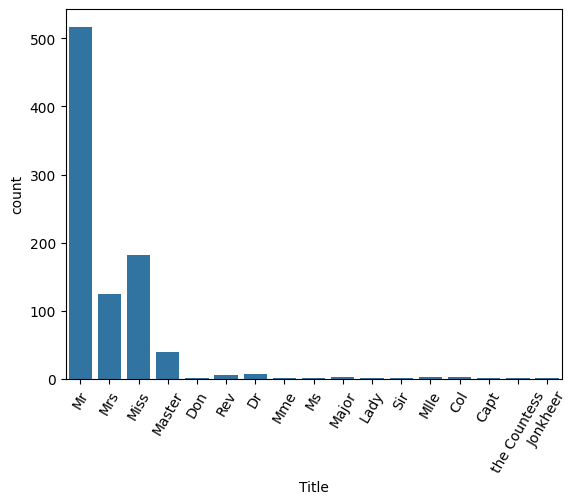

In [26]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

In [27]:
train_df["Title"] = train_df["Title"].replace(
    ["Lady", "the Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"],
    "other"
)

train_df["Title"] = [
    0 if i == "Master"
    else 1 if i in ["Miss", "Ms", "Mlle", "Mrs"]
    else 2 if i == "Mr"
    else 3  # "other"
    for i in train_df["Title"]
]

train_df["Title"].head(20)

,Title
0,2
1,1
2,1
3,1
4,2
5,2
6,2
7,0
8,1
9,1


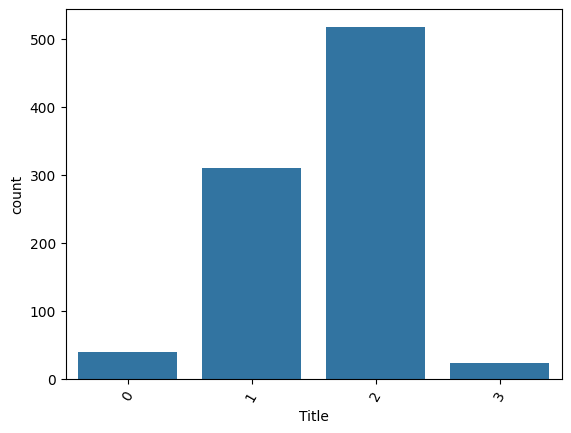

In [28]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()


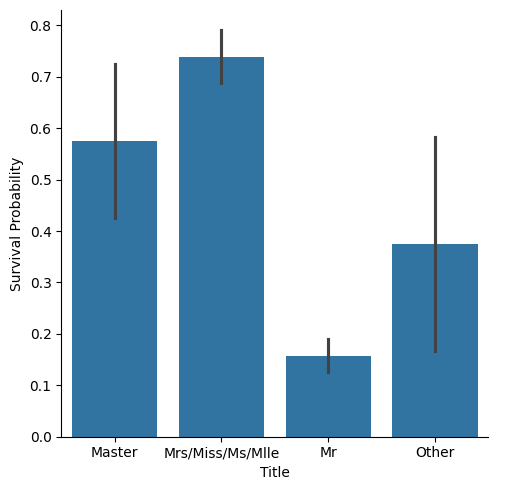

In [29]:
g = sns.catplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs/Miss/Ms/Mlle", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [30]:
train_df.drop(labels=["Name"], axis=1, inplace=True)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [32]:
train_df = pd.get_dummies(train_df, columns = ["Title"], dtype = int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [34]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


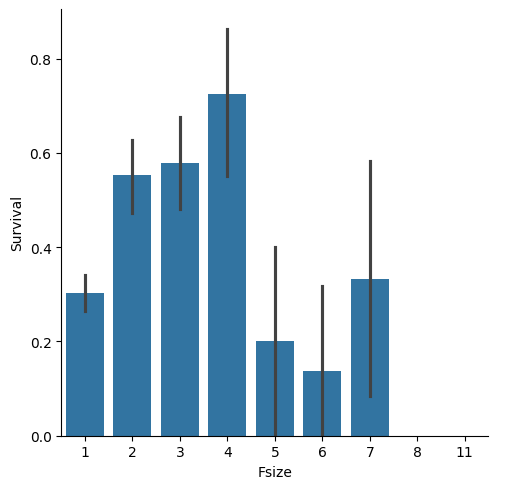

In [36]:
g = sns.catplot(x="Fsize", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [37]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [38]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


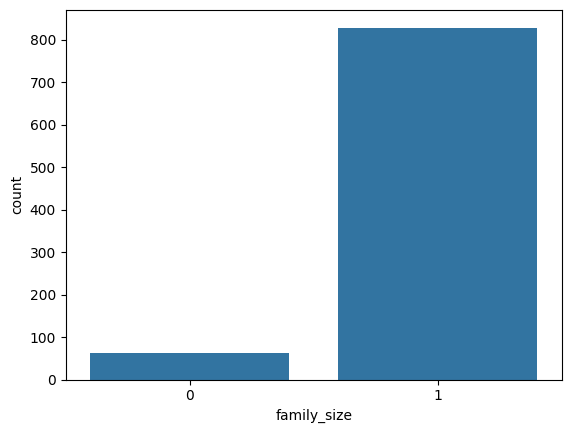

In [39]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

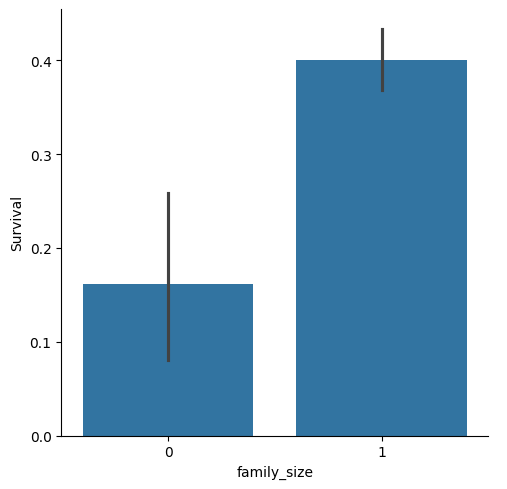

In [40]:
g = sns.catplot(x="family_size", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [41]:
train_df["Embarked"].head()

,Embarked
0,S
1,C
2,S
3,S
4,S


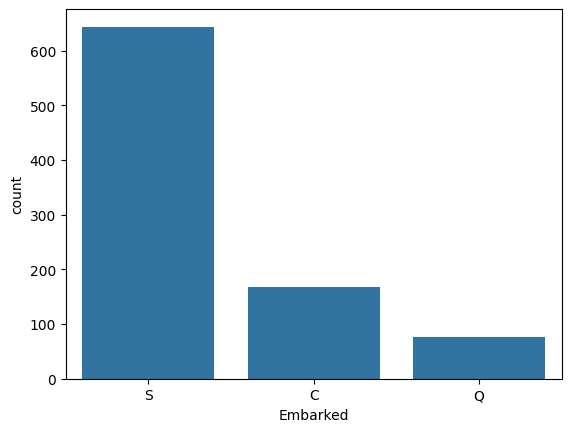

In [42]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [43]:
train_df = pd.get_dummies(data=train_df, columns=["Embarked"], dtype=int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,1,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,1,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,1,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,1,0,0,1


In [44]:
train_df["Ticket"].head(20)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
5,330877
6,17463
7,349909
8,347742
9,237736


In [45]:
a = "A/5. 2151"
a.replace(".", "").replace("/", "").strip().split(" ")[0]

'A5'

In [46]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".", "").replace("/", "").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [47]:
train_df["Ticket"].head(20)

,Ticket
0,A5
1,PC
2,STONO2
3,x
4,x
5,x
6,x
7,x
8,x
9,x


In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,1,0,0,1
1,2,1,1,female,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,1,1,0,0
2,3,1,3,female,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,1,0,0,1
3,4,1,1,female,35.0,1,0,x,53.1000,C123,0,1,0,0,2,1,0,0,1
4,5,0,3,male,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,1,0,0,1


In [49]:
train_df = pd.get_dummies(train_df, columns=["Ticket"], prefix="T", dtype=int)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,male,26.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


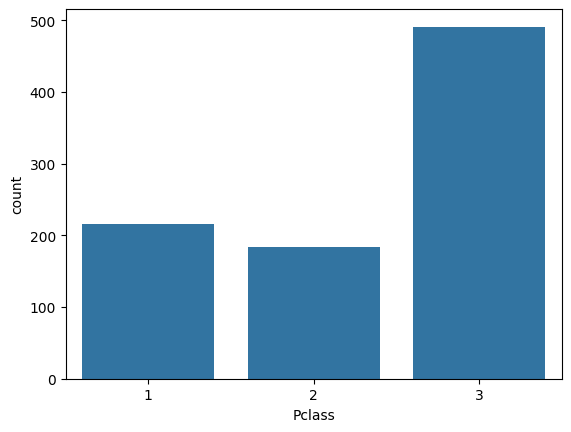

In [50]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [51]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"], dtype=int)
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,female,26.0,0,0,7.9250,NaN,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


In [52]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"], dtype=int)
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,NaN,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [53]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Title_0      891 non-null    int64  
 6   Title_1      891 non-null    int64  
 7   Title_2      891 non-null    int64  
 8   Title_3      891 non-null    int64  
 9   Fsize        891 non-null    int64  
 10  family_size  891 non-null    int64  
 11  Embarked_C   891 non-null    int64  
 12  Embarked_Q   891 non-null    int64  
 13  Embarked_S   891 non-null    int64  
 14  T_A4         891 non-null    int64  
 15  T_A5         891 non-null    int64  
 16  T_AS         891 non-null    int64  
 17  T_C          891 non-null    int64  
 18  T_CA         891 non-null    int64  
 19  T_CASOTO

In [55]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [58]:
train_df_len = len(train_df)
train = train_df[:train_df_len]


In [59]:
train = train_df[:train_df_len]


X_train = train.drop(labels="Survived", axis=1)
y_train = train["Survived"]


X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.33, random_state=42
)


print("X_train:", len(X_train))
print("X_test :", len(X_test))
print("y_train:", len(y_train))
print("y_test :", len(y_test))

X_train: 596
X_test : 295
y_train: 596
y_test : 295


In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

acc_log_train = round(log_reg.score(X_train, y_train) * 100, 2)
acc_log_test = round(log_reg.score(X_test, y_test) * 100, 2)


print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 83.56
Test Accuracy: % 83.39


In [61]:
random_state = 42


classifier = [
    DecisionTreeClassifier(random_state=random_state),
    SVC(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    LogisticRegression(random_state=random_state),
    KNeighborsClassifier()

dt_param_grid = {
    "min_samples_split": range(10, 500, 20),
    "max_depth": range(1, 20, 2)
}

svc_param_grid = {
    "kernel": ["rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],
    "C": [1, 10, 50, 100, 200, 300, 1000]
}

rf_param_grid = {
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators": [100, 300],
    "criterion": ["gini"]
}

logreg_param_grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"],
    "max_iter": [200, 300, 500]
}

knn_param_grid = {
    "n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}
classifier_param = [
    dt_param_grid,
    svc_param_grid,
    rf_param_grid,
    logreg_param_grid,
    knn_param_grid
]

In [63]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

cv_result = []
best_estimators = []

for i in range(len(classifier)):

    clf = GridSearchCV(
        classifier[i],
        param_grid=classifier_param[i],
        cv=StratifiedKFold(n_splits=10),
        scoring="accuracy",
        n_jobs=1,
        verbose=1
    )
    clf.fit(X_train, y_train)

    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])


Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.818728813559322
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.803728813559322
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.830593220338983
Fitting 10 folds for each of 42 candidates, totalling 420 fits
0.8305084745762711
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7937005649717515


In [64]:
cv_results = pd.DataFrame({
    "Cross Validation Accuracy Means": cv_result,
    "ML Models": [
        "DecisionTreeClassifier",  # 🌲
        "SVM",                     # 🌀
        "RandomForestClassifier",  # 🌳
        "LogisticRegression",      # 📈
        "KNeighborsClassifier"     # 👥
    ]
})
cv_results

,Cross Validation Accuracy Means,ML Models
0,0.818729,DecisionTreeClassifier
1,0.803729,SVM
2,0.830593,RandomForestClassifier
3,0.830508,LogisticRegression
4,0.793701,KNeighborsClassifier


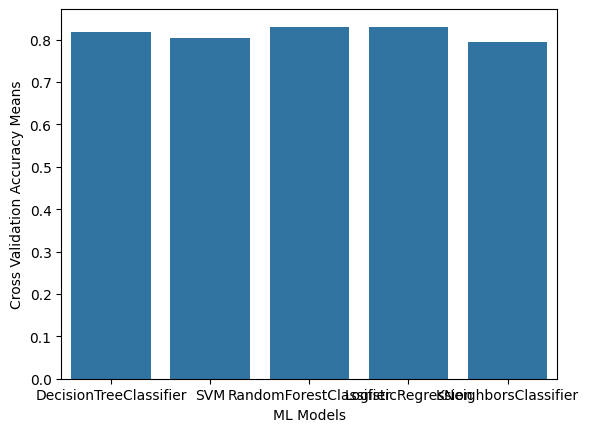

In [65]:
s = sns.barplot(cv_results, x="ML Models", y="Cross Validation Accuracy Means")


In [66]:
votingC = VotingClassifier(
    estimators=[
        ("dt", best_estimators[0]),
        ("rfc", best_estimators[2]),
        ("lr", best_estimators[3])
    ],
    voting="soft",
    n_jobs=1
)

votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test), y_test))

0.8101694915254237
